# Практическая работа №3: Статистический анализ социальных сетей.
Выполнил студент гр. 0382 Гудов Никита. Вариант №28

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей

## Основные теоретические положения


    Диада - элемент сети, представляющий собой пару акторов и (возможную) связь между ними.
    
- Взаимная диада: $D_{ij} = (1, 1)$
- Асимметричная диада $D_{ij} = (1, 0), D_{ij} = (0, 1)$
- Нулевая диада $D_{ij} = (0, 0)$
- Цензус диад(dyad census) - тройка <M, A, N>, где:
    - $M = \sum_{i<j} X_{ij} X_{ji}$
    - $A = X_{++} - 2M$
    - $N = \binom{g}{2} - A - M$
    

- Индекс взаимности Каца-Пауэлла - характеристи изменения тенденции акторов в группу:
    
    $$
    - \inf < \rho _{KP} ≤ 1
    $$
    
    Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом
    
    - Предполагается, что каждый актор делает d выборов из (g-1) акторов, доступных для выбора
    - Вероятность взаимного выбора между любой произвольной парой акторов равна $d^2/(g-1)^2$
    - Математическое ожидание взаимных диад $EM = g(g-1)/2  d^2/(g-1)^2 = gd^2 /2(g-1)$
    - Вероятность того, что общая диада, в которой участвуют акторы является взаимной диадой

 Индекс взаимности Бандиопадхьяйя 

- Данный индекс  основан на минимальном и максимальном значениях количества взаимных диад
- Значение индекса:

$$
\rho_B = \frac{M-M{min}}{M{max}-M{min}}
$$

- $M_min = max_{0≤t≤g} f(t)$
- $M_{max} = \lfloor 1/2(\sum_{i=1}^g x_{i+} -  max_{0≤t≤g} f(t)) \rfloor$

- Функция f(t)


$$
f(t) = \sum_{i=1}^t x_{i+} - t(g-1) - \binom{t}{2}
$$

- Функция g(t):

$$
g(t) = \sum_{i=1}^t x_{i+}- t(t-1) - \sum_{i=t+1}^g min(t, x_{i+})
$$


Доверительный интервал для оценки P

- Оценка парметра P:

$$
\hat P = \frac{\sum_{i=1}^g \sum_{j=1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g-1)}
$$

- Доверительный интервал:

$$
 \hat P_{lower} ≤ P ≤ \hat P_{upper}
$$

- $\hat P_{lower}  = \hat P - z_{\alpha / 2} \sqrt{\hat P ( 1- \hat P) /g(g - 1) }$
- $\hat P_{upper}  = \hat P + z_{\alpha / 2} \sqrt{\hat P ( 1- \hat P) /g(g - 1) }$
- Здесь $z_{\alpha / 2} : Ф(z_{\alpha / 2} ) = 0.5 - \alpha / 2$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать

## Выполнение работы
Каждый пункт работы (*по возможности*) выполняется с помощью кода.
Рекомендованные языки программирования – R или Python.

In [2]:
library(igraph)

In [92]:
g <- 71
p <- 0.63
P0 <- 0.72
a <- 0.01

##### 1. С помощью библиотеки igraph смоделировать случайный орграф G𝑑 на основе модели Эрдеша—Реньи: G𝑑 = G (𝑔, 𝑝), где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами. В R для модели случайного графа Эрдеша—Реньи существует функцияerdos.renyi.game(). Ознакомьтесь с данной моделью и опишите её.

Модель графа подразумевает наличие g вершин и вероятность появления ребра между ними равная p

In [93]:
graph <- erdos.renyi.game(g, p, directed = T)

##### 2. Отобразить полученный орграф

Полученный граф имеет множество ребер, так как вероятность появления каждого из них состовляет 0.63

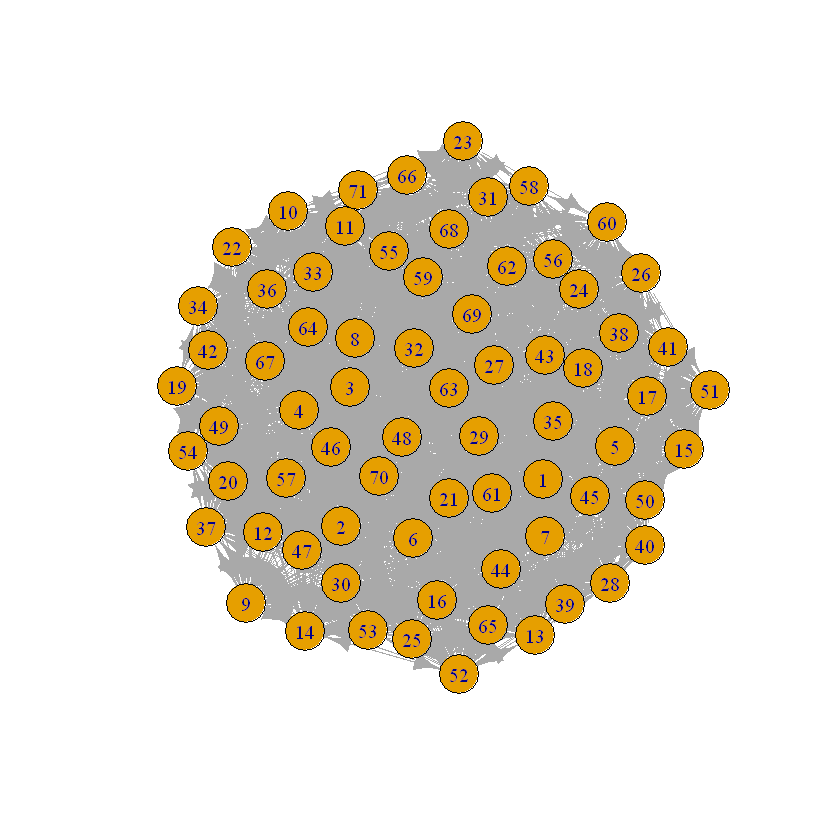

In [94]:
plot(graph)

##### 3. Вычислить «пятичисловую сводку» для графа G𝑑.

Так как p - вероятность появления ребра, то ожидаемо, что плотность такого графа будет близка к этому значению, что и показано ниже.

In [95]:
cat("Размер графа: ", g, "\n")
cat("Плотность графа: ", edge_density(graph), "\n")
cat("Кол-во компонент в графе: ", components(graph)$no, "\n")
cat("Диаметр графа: ", diameter(graph), "\n")
cat("Коэффициент кластеризации графа: ", transitivity(graph), "\n")

Размер графа:  71 
Плотность графа:  0.6404427 
Кол-во компонент в графе:  1 
Диаметр графа:  2 
Коэффициент кластеризации графа:  0.8713697 


##### 4. Вычислить цензус диад. Сделать выводы.

Из всех возможных диад: 40% - взаимных, 46% - асимметричных, 14% - нулевых диад. Практические результаты соотвтествуют теоретическим в соответствии с заданой вероятностью p.

In [96]:
cat("Кол-во взаимных диад: ", dyad_census(graph)$mut, "\n")
cat("Кол-во асимметричных диад: ", dyad_census(graph)$asym, "\n")
cat("Кол-во нулевых диад: ", dyad_census(graph)$null, "\n")

Кол-во взаимных диад:  1017 
Кол-во асимметричных диад:  1149 
Кол-во нулевых диад:  319 


##### 5. Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

При фиксированном наборе тенденция к образованию взаимных пар сильно выше, чем при свободном выборе.

In [97]:
mut <- dyad_census(graph)$mut
d <- 40
fix <- (2*(g-1)*mut-g*d^2)/(g*d*(g-1-d))

X <- as_adj(graph, sparse=F)
L <- sum(rowSums(X))
L2 <- sum(rowSums(X)^2)
free <- (2*(g-1)^2*mut-L^2+L2)/(L*(g-1)^2-L^2+L2)

cat("Fix:", fix, "\n")
cat("Free:", free, "\n")

Fix: 0.3377934 
Free: -0.003721369 


##### 6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

Теоретическая вероятность для фиксированного набора совпадает со средней вероятностью при свободном выборе

In [98]:
fix_p <- (d/(g-1))*((d/(g-1))+fix*(g-1-d)/(g-1))
free_p <- (rowSums(X)*colSums(X))/(g - 1)^2

cat('P фиксированного выбора', fix_p, '\n')
cat('P средняя свободного выбора: ', mean(free_p), '\n')

P фиксированного выбора 0.4092555 
P средняя свободного выбора:  0.4096493 


##### 7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

Исходя из полученного значения, имеется тенденция к образованию взаимных пар

In [99]:
row_sum <- rowSums(X)

f.func <- function(t) {
  return (sum(row_sum[1:t]) - t*(g-1) - choose(t, 2))
}

m_min <- f.func(0)
for (i in 1:g) {
  if (m_min < f.func(i)) {
    m_min <- f.func(i)
  }
}

g.func <- function(t) {
  return (sum(row_sum[1:t]) - t*(t-1) - if (t==g) 0 else sum(min(row_sum[(t+1):g], rep(t, (g-t-1+1)))))
}

m_max <- g.func(0)
for (i in 1:g) {
  if (m_max < g.func(i)) {
    m_max <- g.func(i)
  }
}
m_max <- 1/2 * (sum(row_sum) - m_max)


cat("\nИндекс взаимности Бандиопадхьяйя:",(mut - m_min) / (m_max - m_min))



Индекс взаимности Бандиопадхьяйя: 0.7502895

##### 8. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.


p-value = 2.2e-16. Так как a=0.01>2.2e-16 => гипотеза отвергается

In [101]:
binom.test(sum(X), g*(g-1), p = 0.5)


	Exact binomial test

data:  sum(X) and g * (g - 1)
number of successes = 3183, number of trials = 4970, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.6269215 0.6537987
sample estimates:
probability of success 
             0.6404427 


##### 9. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃0) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

p-value = 2.2e-16. Так как a=0.01>2.2e-16 => гипотеза отвергается

In [102]:
binom.test(sum(X), g*(g-1), p = P0)


	Exact binomial test

data:  sum(X) and g * (g - 1)
number of successes = 3183, number of trials = 4970, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.72
95 percent confidence interval:
 0.6269215 0.6537987
sample estimates:
probability of success 
             0.6404427 


##### 10. Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼) = 0.99. Сделать выводы.

Выявлено, что параметр p с вероятностью 0.99 лежит в 0.6229094 <= p <= 0.6579759, что соответствует действительности.

In [112]:
val <- sum(X)/(g*(g-1))
z_a2 <- qnorm(a/2)
cat(val + z_alpha*sqrt(val*(1-val)/(g*(g-1))),"<= p <=",val - z_a2*sqrt(val*(1-val)/(g*(g-1))))

0.6229094 <= p <= 0.6579759

## Выводы

В ходе практической работы был проведен статистический анализ социальных сетей. Получены навыки работы с математическими пакетами, обеспечивающими необходимые для расчета функции. На конкретном примере исследована тенденция к образованию взаимных пар. Построен доверительный интервал для параметра p.